11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.3838 - val_loss: 0.1878
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.1791 - val_loss: 0.1536
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.1491 - val_loss: 0.1333
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1311 - val_loss: 0.1213
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1201 - val_loss: 0.1129
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1127 - val_loss: 0.1071
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.1071 - val_loss: 0.1029
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.1031 - val_loss: 0.0998
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.1005 - val_loss: 0.0973
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0983 - val_loss: 0.0956
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0963 - val_loss

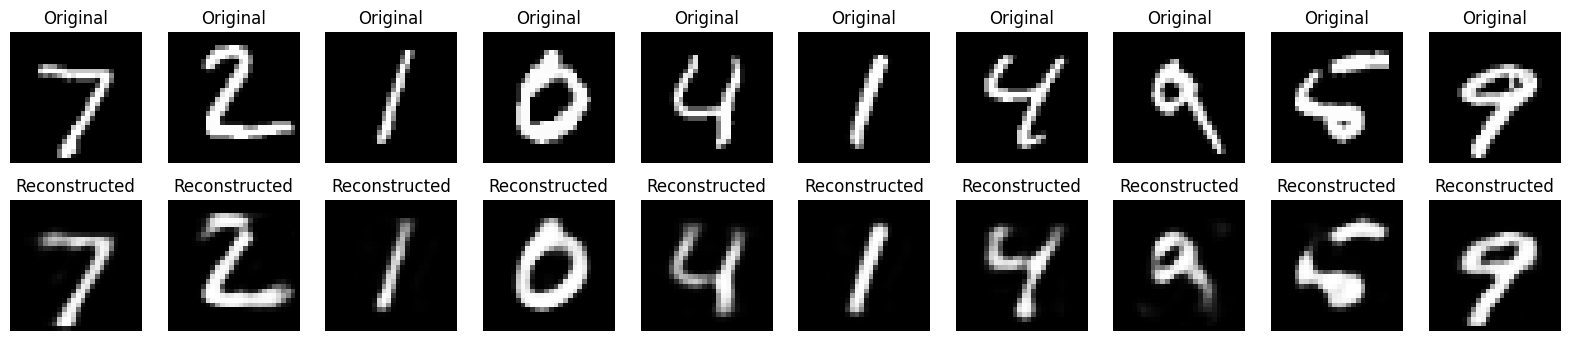

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and flatten the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))

# Set latent dimension
latent_dim = 32

# Define the autoencoder architecture
# Encoder
input_img = Input(shape=(784,))
encoded = Dense(latent_dim, activation='relu')(input_img)

# Decoder
decoded = Dense(784, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

# Train the model
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Predict on test data
decoded_imgs = autoencoder.predict(x_test)

# Plot original vs reconstructed images
n = 10  # how many digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()
